# Sentiment Analysis using Social Media Data

### Task 2.1: Data pre-processing
Using a set of suitable Python libraries retrieve the tweets where the geographical coordinates 
(latitude and longitude) are available. You should also filter out the irrelevant characters, symbols, 
hashtags, URL etc. from the tweets to avoid any possible masking of the actual sentiment associated 
with the tweets. From this point onward you should use the processed tweet data for all the 
subsequent analyses.


 __STEP1:__
I have loaded the csv data of tweets about the donald trump and by using head method, i have displayed first five records to authenticate the prior step.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from textblob import TextBlob
import numpy as np
tweets_trump=pd.read_csv("E:\Github\CIS7030_S2_21_Task2_Data.csv") #load the dataset

In [2]:
tweets_trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,15-10-2020 0.00,1.320000e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,üåê Noticias de inter√©s para latinos de la c...,...,1860,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,21-10-2020 0.00
1,15-10-2020 0.00,1.320000e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26,9,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00.04
2,15-10-2020 0.00,1.320000e+18,"#Trump: As a student I used to hear for years,...",2,1,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,0.00.07
3,15-10-2020 0.00,1.320000e+18,2 hours since last tweet from #Trump! Maybe he...,0,0,Trumpytweeter,8.280000e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01.01
4,15-10-2020 0.00,1.320000e+18,You get a tie! And you get a tie! #Trump ‚Äòs ...,4,3,Twitter for iPhone,4.741380e+07,Rana Abtar - ÿ±ŸÜÿß ÿ£ÿ®ÿ™ÿ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,0.01.05


In [3]:
tweets_trump.dropna(inplace=True)# removed the null values 

__Step2:__
Importing the necessary modules to use at the required times in below mentioned tasks.

nltk : it’s a natural language toolkit used for parse the text and tokenization and stemming and word separation.
    
Re:Regular expressions are used to accomplish operations
    
emoji : Used to extract emoji symbols from text.


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('words')
words = set(nltk.corpus.words.words())
import emoji


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


__Step3:__

In general, tweets include a range of emojis and unique symbols such as @ and #.
I built a function cleaner and fed the tweet column from tweets trump into it to remove these symbols.

I verified whether or not symbols were removed from the tweets column using the head() function, 
and the tweets are now ready for sentimental analysis.

In [5]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet
tweets_trump['tweet'] = tweets_trump['tweet'].map(lambda x: cleaner(x))

In [6]:
tweets_trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
2,15-10-2020 0.00,1.320000e+18,"Trump : As a student I used to hear for , for ...",2,1,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,0.00.07
4,15-10-2020 0.00,1.320000e+18,You get a tie ! And you get a tie ! Trump ‚ rally,4,3,Twitter for iPhone,4.741380e+07,Rana Abtar - ÿ±ŸÜÿß ÿ£ÿ®ÿ™ÿ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,0.01.05
11,15-10-2020 0.00,1.320000e+18,"In 2020 , is being censorship by Twitter to ma...",0,0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,1396,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,0.04.01
12,15-10-2020 0.00,1.320000e+18,Trump Trump2020LandslideVictory Trump2020 4Mor...,3,5,Twitter for Android,1.240000e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",...,496,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,0.04.05
13,15-10-2020 0.00,1.320000e+18,Hutch impeachment ‚ ‚ often Trump & ; lied !!!,2,0,Twitter Web App,3.439562e+08,Sebastian White,SebWrites,"Tortured, literary genius, well probably the f...",...,2755,Edinburgh ~ Heart of Scotland!,55.953346,-3.188375,City of Edinburgh,United Kingdom,Europe,Scotland,SCT,0.05.02


In [7]:

tweets_trumpsample = tweets_trump.sample(n=50)
tweets_trumpsample.head()## 50 random tweets were taken to do analysis.

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
430,15-10-2020 0.24,1.320000e+18,Its sad ! Why cant people get along ! is a agg...,0,0,Twitter Web App,1.080000e+18,Chris Issagholian,CIssagholian,"Plastic cup manufacturing and printing, Plasti...",...,8,"Shadow Hills, Los Angeles",34.261947,-118.351746,Los Angeles,United States of America,North America,California,CA,2.42.00
279,15-10-2020 0.15,1.320000e+18,Should one be of free health care when one goe...,0,0,Twitter Web App,1.310000e+18,Alain Dardar,AlainDardar,I will always say it the way it is... This is ...,...,5,"Bronx, NY",40.850656,-73.866524,New York,United States of America,North America,New York,NY,1.45.06
431,15-10-2020 0.24,1.320000e+18,Trump is bragging about how he ' t have at his...,3,1,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2.42.03
349,15-10-2020 0.19,1.320000e+18,": "" cut with Trump in June 2015 over racist ab...",0,0,Twitter Web App,5.848852e+07,thelaughmakers@gmail.com,TheLaughMakers,"Attorney, TV comedy writer, author of THE LAUG...",...,1855,"Studio City, California",34.148399,-118.396188,Los Angeles,United States of America,North America,California,CA,2.12.05
206,15-10-2020 0.10,1.320000e+18,Sweet 16 ' super - spreader ' party in New Yor...,0,0,Twitter for iPad,1.762030e+07,innovIDrsrchr,Band_Dad,PID + Lupus + ID research scientist. NCSU Wolf...,...,647,"Raleigh, NC",35.780398,-78.639099,Raleigh,United States of America,North America,North Carolina,NC,1.18.04


## Task 2.2: Polarity analysis


The Python TextBlob library makes it easy to perform a variety of Natural Language Processing (NLP) operations.
Polarity and Subjectivity are two main attributes of TextBlob. 
I have developed a method to find polarity of tweets and return the same into getTextPolarity. 
I used the polarity function on the tweets column to create a new column called 'polarity’ with values.

In [8]:
def getTextPolarity(txt):
     return TextBlob(txt).sentiment.polarity#Write a function to generate polarity

In [9]:
##Apply the above function on the sampled tweets
tweets_trumpsample['polarity'] = tweets_trumpsample['tweet'].apply(getTextPolarity)
tweets_trumpsample.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,polarity
430,15-10-2020 0.24,1.320000e+18,Its sad ! Why cant people get along ! is a agg...,0,0,Twitter Web App,1.080000e+18,Chris Issagholian,CIssagholian,"Plastic cup manufacturing and printing, Plasti...",...,"Shadow Hills, Los Angeles",34.261947,-118.351746,Los Angeles,United States of America,North America,California,CA,2.42.00,-0.093750
279,15-10-2020 0.15,1.320000e+18,Should one be of free health care when one goe...,0,0,Twitter Web App,1.310000e+18,Alain Dardar,AlainDardar,I will always say it the way it is... This is ...,...,"Bronx, NY",40.850656,-73.866524,New York,United States of America,North America,New York,NY,1.45.06,0.200000
431,15-10-2020 0.24,1.320000e+18,Trump is bragging about how he ' t have at his...,3,1,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2.42.03,0.107143
349,15-10-2020 0.19,1.320000e+18,": "" cut with Trump in June 2015 over racist ab...",0,0,Twitter Web App,5.848852e+07,thelaughmakers@gmail.com,TheLaughMakers,"Attorney, TV comedy writer, author of THE LAUG...",...,"Studio City, California",34.148399,-118.396188,Los Angeles,United States of America,North America,California,CA,2.12.05,0.000000
206,15-10-2020 0.10,1.320000e+18,Sweet 16 ' super - spreader ' party in New Yor...,0,0,Twitter for iPad,1.762030e+07,innovIDrsrchr,Band_Dad,PID + Lupus + ID research scientist. NCSU Wolf...,...,"Raleigh, NC",35.780398,-78.639099,Raleigh,United States of America,North America,North Carolina,NC,1.18.04,0.367685


By using histogram , plotted the polarity values from the tweets_trumpsample data frame.

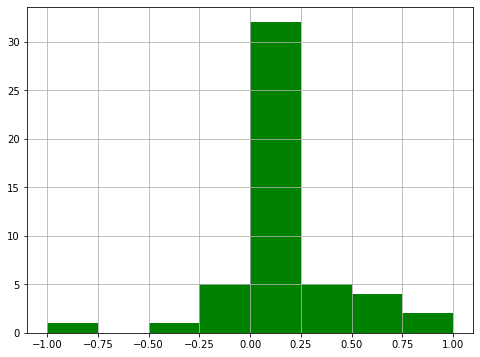

In [10]:
#Show the polarity values using histogram
fig, ax = plt.subplots(figsize=(8, 6))
tweets_trumpsample['polarity'].hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="green")

plt.show()

__Interpretation of polarity histogram__

Range of polarity varies between -1 and 1 where the positive end denotes positive tone,
and negative end denotes negative tone in the sentence. Hence, a polarity of 0 would be neutral.

From the above map, Maximum percentage of people are neutral opinion about donald_trump 
as maximum percentage of values lies in between 0.00 to 0.25.

The average polarity value taken into consideration because multiple the tweets generated from 
the same location in the below lines of code.

In [11]:
final_df1=tweets_trumpsample.groupby('state',as_index=False)['polarity'].mean() #Polarity mean calculation
final_df1 

,state,polarity
0,California,-0.068701
1,Colorado,0.400000
2,Delhi,0.000000
3,District of Columbia,0.250000
4,England,0.050893
5,Florida,-0.166667
6,Georgia,-0.138281
7,Hawaii,0.500000
8,Ile-de-France,0.500000
9,Illinois,-0.057576


__Polarity versus States__

In the next step, using barplot i have visualised the states and thier polarity values.

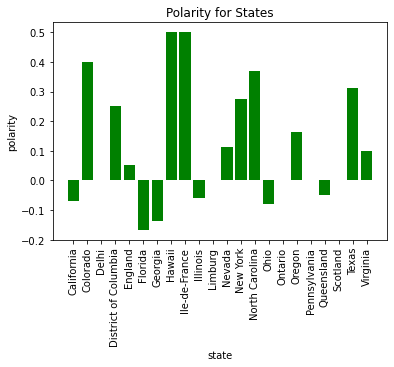

In [12]:
df = final_df1
  
X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])
  
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Polarity for States")
plt.xlabel("state", )
plt.xticks(rotation='vertical')
plt.ylabel("polarity")
  
# Show the plot
plt.show()

To represent polarity with locations in United States,
I have latitude and longitude values using available geodata with the help of geocoders.
Geocoders are tools for determining the geographical coordinates of addresses, business names, points of interest, and other locations.
Now the final_df1 data frame contains location data as well along with the state information.
From this dataframe, dropped the null values for better visualisation.


In [13]:
from geopy.geocoders import  Nominatim
from geopy.extra.rate_limiter import RateLimiter
geolocator = Nominatim(user_agent="Geo")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
final_df1['location'] = final_df1['state'].apply(geocode)

#final_df1['point'] = newdata2['location'].apply(lambda loc: tuple(loc.point) if loc else None)
final_df1['longitude'] =final_df1['location'].apply(lambda x: x.longitude if x else None)
final_df1['latitude'] =final_df1['location'].apply(lambda x: x.latitude if x else None)
final_df1.dropna(inplace=True)
final_df1

,state,polarity,location,longitude,latitude
0,California,-0.068701,"(California, United States, (36.7014631, -118....",-118.755997,36.701463
1,Colorado,0.400000,"(Colorado, United States, (38.7251776, -105.60...",-105.607716,38.725178
2,Delhi,0.000000,"(Delhi, India, (28.6273928, 77.1716954))",77.171695,28.627393
3,District of Columbia,0.250000,"(District of Columbia, United States, (38.8938...",-76.988043,38.893847
4,England,0.050893,"(England, United Kingdom, (52.5310214, -1.2649...",-1.264906,52.531021
5,Florida,-0.166667,"(Florida, United States, (27.7567667, -81.4639...",-81.463983,27.756767
6,Georgia,-0.138281,"(Georgia, United States, (32.3293809, -83.1137...",-83.113737,32.329381
7,Hawaii,0.500000,"(Hawaii, United States, (19.593801499999998, -...",-155.428370,19.593801
8,Ile-de-France,0.500000,"(Île-de-France, France métropolitaine, France,...",2.753786,48.644306
9,Illinois,-0.057576,"(Illinois, United States, (40.0796606, -89.433...",-89.433729,40.079661


I used folium map to visualise the mean polarity values received from locations
by passing latitude and longitude values to the folium marker and
the popup marker as polarity which specifies the location where the tweet is originated and presented on polarity as shown below.
To plot folium maps, I have imported the folium libraries.


In [14]:
import folium
polarity=folium.Map(location=[34.395342, -111.7632], zoom_start=4)
for index, location_info in final_df1.iterrows():
    folium.Marker([location_info["latitude"],
                  location_info["longitude"]],
                 popup = location_info["polarity"]).add_to(polarity)
polarity

## Task 2.3 Subjectivity analysis

Like the polarity, I have created a method to find subjectivity of tweets and return the same into Subjectivity.
I used the same Subjectivity function on the tweets column to create a new column called 'Subjectivity’ with values obtained.

In [15]:
#Write a function to generate subjectivity
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

In [16]:
tweets_trumpsample['subjectivity'] = tweets_trumpsample['tweet'].apply(getTextSubjectivity)
tweets_trumpsample.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,lat,long,city,country,continent,state,state_code,collected_at,polarity,subjectivity
430,15-10-2020 0.24,1.320000e+18,Its sad ! Why cant people get along ! is a agg...,0,0,Twitter Web App,1.080000e+18,Chris Issagholian,CIssagholian,"Plastic cup manufacturing and printing, Plasti...",...,34.261947,-118.351746,Los Angeles,United States of America,North America,California,CA,2.42.00,-0.093750,0.500000
279,15-10-2020 0.15,1.320000e+18,Should one be of free health care when one goe...,0,0,Twitter Web App,1.310000e+18,Alain Dardar,AlainDardar,I will always say it the way it is... This is ...,...,40.850656,-73.866524,New York,United States of America,North America,New York,NY,1.45.06,0.200000,0.400000
431,15-10-2020 0.24,1.320000e+18,Trump is bragging about how he ' t have at his...,3,1,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2.42.03,0.107143,0.571429
349,15-10-2020 0.19,1.320000e+18,": "" cut with Trump in June 2015 over racist ab...",0,0,Twitter Web App,5.848852e+07,thelaughmakers@gmail.com,TheLaughMakers,"Attorney, TV comedy writer, author of THE LAUG...",...,34.148399,-118.396188,Los Angeles,United States of America,North America,California,CA,2.12.05,0.000000,0.000000
206,15-10-2020 0.10,1.320000e+18,Sweet 16 ' super - spreader ' party in New Yor...,0,0,Twitter for iPad,1.762030e+07,innovIDrsrchr,Band_Dad,PID + Lupus + ID research scientist. NCSU Wolf...,...,35.780398,-78.639099,Raleigh,United States of America,North America,North Carolina,NC,1.18.04,0.367685,0.567803


By using histogram , plotted the Subjectivity values from the tweets_trumpsample data frame.

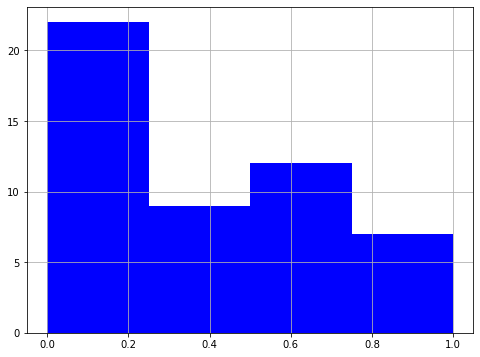

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
tweets_trumpsample['subjectivity'].hist(bins=[0, 0.25, 0.5, 0.75, 1],
                                
        ax=ax, color="blue")

plt.show()

__Interpretation of Subjectivity histogram__

Subjectivity is categorised into two categories; subjectivity which means personal feeling or judgement 
where as objetivity refers to factual information or real time expereince and this lies in between 0 to 1.
From the above figure , we can say that people are in between about donal trump but more towards to objectful.


In [18]:
final_df2=tweets_trumpsample.groupby('state',as_index=False)['subjectivity'].mean()
final_df2 #The average Subjectivity value taken into consideration because multiple the tweets generated from the same location in the below lines of code.

,state,subjectivity
0,California,0.345126
1,Colorado,0.375000
2,Delhi,0.000000
3,District of Columbia,0.500000
4,England,0.286607
5,Florida,0.433333
6,Georgia,0.650000
7,Hawaii,0.800000
8,Ile-de-France,0.500000
9,Illinois,0.386667


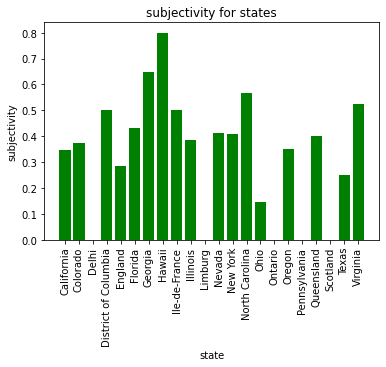

In [19]:
df = final_df2
  
X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])
  
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("subjectivity for states")
plt.xlabel("state", )
plt.xticks(rotation='vertical')
plt.ylabel("subjectivity")
  
# Show the plot
plt.show()#By using histogram , plotted the polarity values from the tweets_trumpsample data frame.

To represent Subjectivity with locations in United States, I have latitude and longitude values using 
available geodata with the help of geocoders. 
Geocoders are tools for determining the geographical coordinates of addresses, business names, points of interest, and other locations.
Now the final_df1 data frame contains location data as well along with the state information.
From this dataframe, dropped the null values for better visualisation.

In [20]:
geolocator = Nominatim(user_agent="Geo")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
final_df2['location'] = final_df2['state'].apply(geocode)

final_df2['longitude'] =final_df2['location'].apply(lambda x: x.longitude if x else None) #longitude and latitude findings
final_df2['latitude'] =final_df2['location'].apply(lambda x: x.latitude if x else None)
final_df2.dropna(inplace=True)
final_df2

,state,subjectivity,location,longitude,latitude
0,California,0.345126,"(California, United States, (36.7014631, -118....",-118.755997,36.701463
1,Colorado,0.375000,"(Colorado, United States, (38.7251776, -105.60...",-105.607716,38.725178
2,Delhi,0.000000,"(Delhi, India, (28.6273928, 77.1716954))",77.171695,28.627393
3,District of Columbia,0.500000,"(District of Columbia, United States, (38.8938...",-76.988043,38.893847
4,England,0.286607,"(England, United Kingdom, (52.5310214, -1.2649...",-1.264906,52.531021
5,Florida,0.433333,"(Florida, United States, (27.7567667, -81.4639...",-81.463983,27.756767
6,Georgia,0.650000,"(Georgia, United States, (32.3293809, -83.1137...",-83.113737,32.329381
7,Hawaii,0.800000,"(Hawaii, United States, (19.593801499999998, -...",-155.428370,19.593801
8,Ile-de-France,0.500000,"(Île-de-France, France métropolitaine, France,...",2.753786,48.644306
9,Illinois,0.386667,"(Illinois, United States, (40.0796606, -89.433...",-89.433729,40.079661


I used folium map to visualise the mean Subjectivity values received from locations by passing latitude and longitude values to the folium marker 
and the popup marker as Subjectivity which specifies the location where the tweet is originated and 
presented on polarity as shown below. 
To plot folium maps, I have imported the folium libraries.

In [21]:
import folium

subjectivity=folium.Map(location=[34.395342, -111.763275], zoom_start=3)
for index, location_info in final_df2.iterrows():
    folium.Marker([location_info["latitude"],
                  location_info["longitude"]],
                  popup = location_info["subjectivity"]).add_to(subjectivity)
    
subjectivity  
    

## Task 2.4 Storify/Interpretation

As an election consultant to work in campaign team of Donald Trump, 
people’s opinions and views and feeling are collected in the form of tweets from twitter data. 
Sentimental analysis helps in analysing the positive and negative by using different natural language processing methodologies.
For this analysis, location plays a major role.
After analysation and visualisation of polarity and subjectivity with respect to location, data analysis of geospatial data from the United States is illustrated below:
    
__Polarity:__
    
A "textblob" is used to construct sentiment analysis of the public's favourable, neutral, or negative attitudes, feelings, and opinions .'
From the above visualisation of polarity values, Maximum percentage of people are neutral opinion followed by positive about donald_trump 
as US president because maximum percentage of values lies in between 0.00 to 0.25.

As we can see from the list of states below, people are declaring their support for Trump as President of the United States. 
In comparison to the neutral and negative lists, however, these states are fewer. 
To win votes, Trump must continue to provide the same support and services to the following states.

District of Columbia, Hawaii, Michigan, Oregon, Texas, Virginia

The states of Arizona, Colorado, Illinois, Massachusetts, New York people are neutral about Trump 
as President that means they have mixed feeling (positive and negative) opinions.
As a election consultant, there is a chance of getting votes from people if Trump impress the people by campaigning 
and explain the goodness way of his ruling and also
from the rest of state’s Trumps is having negative opinion about his winning. 
By doing continuous campaigns and meetings Trump may change their mindset and feelings.

__Subjectivity__

Subjectivity is categorised into two categories; 
subjectivity which means personal feeling or judgement whereas objectivity refers to factual information or real time experience and 
this lies in between 0 to 1, where 0.0 is objective and 1.0 is subjective.

From above findings we can say that people are in between about Donald trump but more towards to objectual.
Three states Arizona, Colorado, New York, are objective about Trump winning. 
It means they may have strong or real time experience or disappointment from the work of Trump.

As an election consultant, I can suggest that , with good interaction with people and explaining the advantages of Trump as US President may give good number of votes,
New York is one of the highest population state in USA, Trump’s team needs to put effort to impress them to get majority of votes .
People in all other states are divided on Trump's election victory. It's possible that people have feelings or opinions regarding Trump. 
This subjective list has a greater number of states than the objective list. 
A large number of companions and gatherings are beneficial in obtaining a majority of votes.

